In [131]:


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from keras.utils import to_categorical
import numpy as np
from array import array




In [132]:
pwd

'/home/jovyan/Text_Mining/Naive Bayes_Decision Trees_SVMs/NN'

In [133]:

filename1="DF_LEM.csv"
DF = pd.read_csv("/home/jovyan/Text_Mining/Naive Bayes_Decision Trees_SVMs/NN/"+str(filename1), index_col = 0)
#print("The original dataset is\n", DF)
n = len(DF) ## number of rows of entire X
NumCols=DF.shape[1]-1
print(NumCols) 
print(n)


8560
454


In [134]:
DF.head()

,aaron,aaron rodgers,abbott,abbott called,ability,ability mental,abortifacient,abortifacient concern,abortion,abortion activist,...,youth sport,youth support,youth underscore,youtube,youtube video,youtuber,youtuber reflects,zeigler,zeigler explains,LABEL
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutral
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutral


In [135]:
## Normalize the DF
# Applying sum function
Sums = DF.drop(columns = "LABEL").sum(axis=0) ## get column sums
#print(Sums.unique)
# Using div function
for i in range(NumCols-1):
    #print(i)
    col=i+1
    DF[DF.columns[col]]=DF[DF.columns[col]]/Sums[col]
    
print(DF.head())


   aaron  aaron rodgers  abbott  abbott called  ability  ability mental  \
0      1            1.0     0.0            0.0      0.0             0.0   
1      0            0.0     0.0            0.0      0.0             0.0   
2      0            0.0     0.0            0.0      0.0             0.0   
3      0            0.0     0.0            0.0      0.0             0.0   
4      0            0.0     0.0            0.0      0.0             0.0   

   abortifacient  abortifacient concern  abortion  abortion activist  ...  \
0            0.0                    0.0       0.0                0.0  ...   
1            0.0                    0.0       0.0                0.0  ...   
2            0.0                    0.0       0.0                0.0  ...   
3            0.0                    0.0       0.0                0.0  ...   
4            0.0                    0.0       0.0                0.0  ...   

   youth sport  youth support  youth underscore  youtube  youtube video  \
0          

In [136]:
## Take the label off of X and make it a numpy array

X = np.asarray(DF.drop(columns = "LABEL")).astype('float32')

print(X)
#print("Just the training data is\n", X)
## Set y to the label. Check the shape!
y = DF["LABEL"]
print(y.unique())

[[1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['Negative' 'Neutral' 'Positive']


In [137]:
y.value_counts()

Negative    220
Neutral     121
Positive    113
Name: LABEL, dtype: int64

In [139]:

#y = np.array(DF["LABEL"])
#y = np.array(DF.iloc[:,-1])
#print(y)
y_orig = DF["LABEL"]
temp = y 

temp = temp.replace('\[|\'|\"|\]| ', '', regex=True)

temp = temp.str.split(',')

final_list = [x for xs in temp.tolist() for x in xs]

#print(final_list)



### Categorical data to be converted to numeric data

### Universal list of colors
labels = ["Positive", "Negative", "Neutral"]

### map each color to an integer
mapping = {}
for x in range(len(labels)):
    mapping[labels[x]] = x

# integer representation
for x in range(len(final_list)):
    final_list[x] = mapping[final_list[x]]

one_hot_encode = to_categorical(final_list)
for i in one_hot_encode[1:10]:
    print(i)
for x in y[1:10]:
    print(x)
y = one_hot_encode
print(type(y))

#y = pd.Series(list(one_hot_encode))

[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
Neutral
Positive
Positive
Neutral
Neutral
Negative
Positive
Negative
Negative
<class 'numpy.ndarray'>


In [140]:
len(y)

454

In [141]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [142]:
## Testing data and labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [143]:
print(X_train)
print(len(X_train))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
317


In [144]:
print(X_test)
print(len(X_test))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
137


In [145]:
print(y_train)
print(len(y_train))

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [146]:
print(y_test)
print(len(y_test))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0.

In [147]:
print(NumCols)

8560


In [148]:
InputColumns = NumCols
NumberOfLabels = 3

In [149]:


#####################################################
#--------------------------------------------
## MODEL 2 - for 3D labels 0, 1, 2 with
## one-hot encoding
#-------------------------------------------------
#######################################################
dimensions = 8560

NN_Model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(dimensions,), activation="relu"), ## Hidden layer 1
  tf.keras.layers.Dense(5, activation="relu"),
  #tf.keras.layers.Dense(3, activation='sigmoid'),## Hidden layer 3
  #tf.keras.layers.Dense(3, activation='sigmoid'),## Hidden layer 4
  tf.keras.layers.Dense(3, activation='softmax') ## output layer
])

# NN_Model = tf.keras.models.Sequential()
# NN_Model.add(tf.keras.layers.Flatten())
# ## 128 units (neurons) in the layer
# NN_Model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu ))
# NN_Model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu ))
# NN_Model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax ))

NN_Model.compile(
                 loss="categorical_crossentropy",
                 metrics=["accuracy"],
                 optimizer='adam' 
                 )



Hist = NN_Model.fit(X_train,y_train, epochs=24, validation_data=(X_test, y_test))

Epoch 1/24
10/10 [==============================] - 1s 26ms/step - loss: 1.0894 - accuracy: 0.4385 - val_loss: 1.0908 - val_accuracy: 0.4380
Epoch 2/24
10/10 [==============================] - 0s 8ms/step - loss: 1.0368 - accuracy: 0.4574 - val_loss: 1.0859 - val_accuracy: 0.4453
Epoch 3/24
10/10 [==============================] - 0s 8ms/step - loss: 0.9931 - accuracy: 0.4637 - val_loss: 1.0805 - val_accuracy: 0.4672
Epoch 4/24
10/10 [==============================] - 0s 9ms/step - loss: 0.9475 - accuracy: 0.4795 - val_loss: 1.0755 - val_accuracy: 0.4672
Epoch 5/24
10/10 [==============================] - 0s 8ms/step - loss: 0.9007 - accuracy: 0.4890 - val_loss: 1.0711 - val_accuracy: 0.4672
Epoch 6/24
10/10 [==============================] - 0s 8ms/step - loss: 0.8547 - accuracy: 0.4953 - val_loss: 1.0681 - val_accuracy: 0.4672
Epoch 7/24
10/10 [==============================] - 0s 9ms/step - loss: 0.8094 - accuracy: 0.5016 - val_loss: 1.0664 - val_accuracy: 0.4672
Epoch 8/24
10/10 [=

In [150]:
history_dict = Hist.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [151]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.4384858012199402, 0.4574132561683655, 0.4637224078178406, 0.47949525713920593, 0.4889589846134186, 0.4952681362628937, 0.5015772581100464, 0.4952681362628937, 0.5015772581100464, 0.511040985584259, 0.5236592888832092, 0.5488958954811096, 0.5993691086769104, 0.7129337787628174, 0.85173499584198, 0.921135663986206, 0.9589905142784119, 0.9747633934020996, 0.9779179692268372, 0.9842271208763123, 0.9873816967010498, 0.9905362725257874, 0.9968454241752625, 0.9968454241752625]
[0.43795621395111084, 0.44525548815727234, 0.46715328097343445, 0.46715328097343445, 0.46715328097343445, 0.46715328097343445, 0.46715328097343445, 0.46715328097343445, 0.46715328097343445, 0.46715328097343445, 0.46715328097343445, 0.45985400676727295, 0.45985400676727295, 0.46715328097343445, 0.47445255517959595, 0.47445255517959595, 0.47445255517959595, 0.47445255517959595, 0.47445255517959595, 0.47445255517959595, 0.47445255517959595, 0.46715328097343445, 0.46715328097343445, 0.46715328097343445]
[1.08944296836853

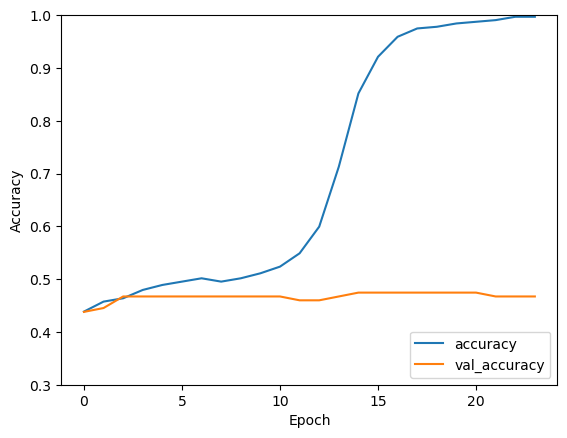

In [152]:
plt.plot(acc, label= 'accuracy')
plt.plot(val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')



In [160]:
##Test and Model
Test_Loss, Test_Accuracy = NN_Model.evaluate(X_test, y_test)

## Save the Model
NN_Model.save("Example2_NN_Model")

## Predictions
predictions=NN_Model.predict(X_test)
print(predictions)



5/5 [==============================] - 0s 3ms/step - loss: 1.0917 - accuracy: 0.4672


INFO:tensorflow:Assets written to: Example2_NN_Model/assets


INFO:tensorflow:Assets written to: Example2_NN_Model/assets


5/5 [==============================] - 0s 3ms/step
[[0.19034901 0.4713226  0.3383284 ]
 [0.1977427  0.5044445  0.29781276]
 [0.2034596  0.4587635  0.337777  ]
 [0.1904797  0.5194218  0.29009846]
 [0.1717575  0.56800425 0.2602382 ]
 [0.15678957 0.4638489  0.3793615 ]
 [0.1854073  0.48098427 0.3336084 ]
 [0.16052507 0.53935015 0.30012476]
 [0.05067319 0.8129939  0.136333  ]
 [0.18400891 0.5231101  0.29288104]
 [0.18257387 0.45659056 0.36083558]
 [0.10498843 0.50306404 0.39194757]
 [0.11641401 0.5369456  0.34664047]
 [0.12321505 0.5491407  0.32764426]
 [0.16713928 0.51086515 0.32199562]
 [0.1020319  0.615791   0.28217715]
 [0.20533858 0.5215455  0.27311593]
 [0.1478685  0.53674793 0.31538358]
 [0.11300165 0.43196622 0.4550321 ]
 [0.11408342 0.5526563  0.33326027]
 [0.18838641 0.5151452  0.29646832]
 [0.1296494  0.503582   0.36676854]
 [0.170285   0.48804817 0.34166682]
 [0.13964981 0.550814   0.30953622]
 [0.13418932 0.5371544  0.32865635]
 [0.10562586 0.577236   0.3171382 ]
 [0.09499945 